<a href="https://colab.research.google.com/github/vitalns/scatterplot/blob/main/scatterplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-success">
<font size="5" color="blue">Диаграмма рассеяния </font>
<font size="7">🎆</font>
</div>
<p><b><i>Описание:</i></b>
Построение диаграммы рассеяния, использую библиотеки matplotlib и seaborn, на примере датасета penguins. На диаграмму добавлены маркеры средних значения и анотации к ним. Построение нескольких диаграмм на одном рисунке. Настройка области построения, осей, шкалы, легенды,... </p>

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [355]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

In [356]:
# Загрузим датасет penguins

penguins = sns.load_dataset("penguins")
penguins.dropna(inplace=True)
penguins.reset_index(drop=True, inplace=True)
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [357]:
# Создадим таблицу со средними значениями.

species = penguins.species.unique()
# # Раньше и так работало
# averages = [penguins[penguins['species'] == i].mean().to_list() for i in species]
averages = [penguins[penguins['species'] == i][penguins.select_dtypes(np.number).columns].mean().to_list() for i in species]
avg_data = pd.DataFrame(averages, columns=penguins.select_dtypes(np.number).columns)
avg_data['species'] = species
# avg_data['average'] = 'mean'
avg_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,38.823973,18.347260,190.102740,3706.164384,Adelie
1,48.833824,18.420588,195.823529,3733.088235,Chinstrap
2,47.568067,14.996639,217.235294,5092.436975,Gentoo


In [358]:
# Добавим средние значения к общей таблице.

avg = avg_data.copy(deep=True)
avg.species = 'mean' # Добавляем заглушку для hue в pairgrid.
data_all = pd.concat([penguins, avg], ignore_index=True)
data_all.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
331,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female
332,Gentoo,Biscoe,49.900000,16.100000,213.000000,5400.000000,Male
333,mean,NaN,38.823973,18.347260,190.102740,3706.164384,NaN
334,mean,NaN,48.833824,18.420588,195.823529,3733.088235,NaN
335,mean,NaN,47.568067,14.996639,217.235294,5092.436975,NaN


___

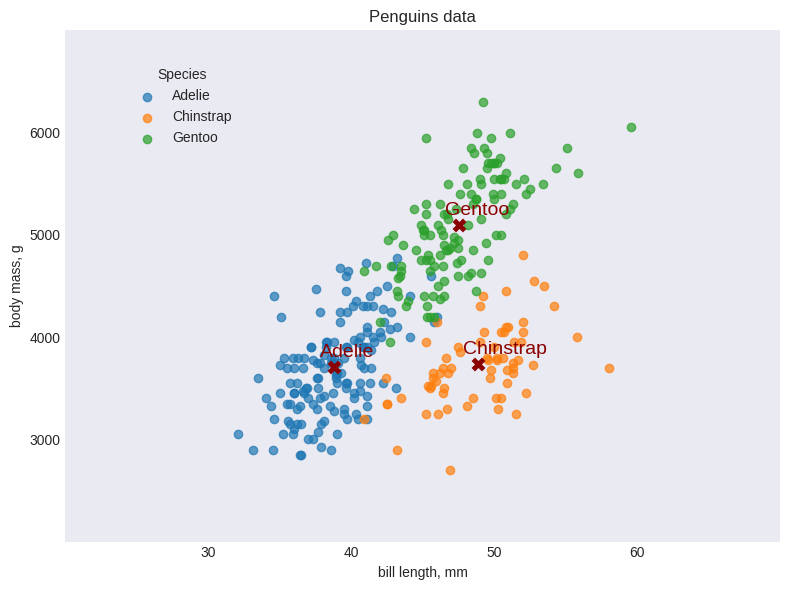

In [359]:
# Построим диаграмму рассеяния пары признаков (bill_length_mm, body_mass_g), используя matplotlib.

# Изменим настройки графиков.
params = {'axes.titlesize': 16, 'axes.labelsize': 12,
          'xtick.labelsize': 10, 'ytick.labelsize': 10}
# plt.rcParams.update(params)  # Глобальная настройка rc-параметров
mpl.rcParams.update(mpl.rcParamsDefault)  # Сброс настроек

# Временные настройки rc-параметров.
with mpl.rc_context(params) and plt.style.context('seaborn-v0_8-dark'):
  plt.figure(figsize=(8, 6))
  for species in ["Adelie", "Chinstrap", "Gentoo"]:
    plt.scatter(penguins[penguins.species == species]["bill_length_mm"],
                penguins[penguins.species == species]["body_mass_g"],
                marker='o', alpha=.7,
                label=species
                )
  # Строим маркеры средних значений
  plt.scatter("bill_length_mm", "body_mass_g",
              data=avg_data,
              s=100, marker='X',
              # edgecolors='black',  # цвет контура маркера
              linewidths=0,  # толщина контура маркера
              color='darkred',
              label='mean'
              )

  # Добавим подписи и легенду
  plt.xlabel("bill length, mm")
  plt.ylabel("body mass, g")
  plt.title("Penguins data")
  plt.legend(frameon=False)

  # Настроим пределы по осям и шкалу
  plt.xlim([20, 70])  # Получить значения plt.gca().get_xlim()
  plt.xticks(ticks=np.arange(30, 70, 10))
  plt.ylim([2000, 7000])
  plt.yticks(np.arange(3000, 7000, 1000))

  # Зададим подписи к средним значениям используя лямбда функцию.
  # color_palette = dict(zip(["Adelie", "Chinstrap", "Gentoo"],[0, 1, 2]))
  avg_data.apply(lambda x: plt.annotate(x.species,
                                        xy=(x.loc['bill_length_mm']-1,
                                        x.loc['body_mass_g']+100),
                                        color='darkred',
                                        # color=plt.cm.tab10(color_palette.get(x.species)), # аннотация в цвет маркера
                                        fontsize=14,
                                        fontweight='regular'),
                axis=1)
  # # Подписи к средним значениям можно задать вручную.
  # plt.annotate('mean', xy=(avg_data.loc[0,'bill_length_mm']-2, avg_data.loc[0,'body_mass_g']+50), color='darkred')

  # Управление легендой
  ax = plt.gca()
  h, l = ax.get_legend_handles_labels()
  ax.legend(h[:3], l[:3], title='Species', bbox_to_anchor=(.25, .95), frameon=False)

  plt.tight_layout()
  plt.show()
  plt.savefig("Penguins data.png", format='png', dpi=150)

plt.close()

___

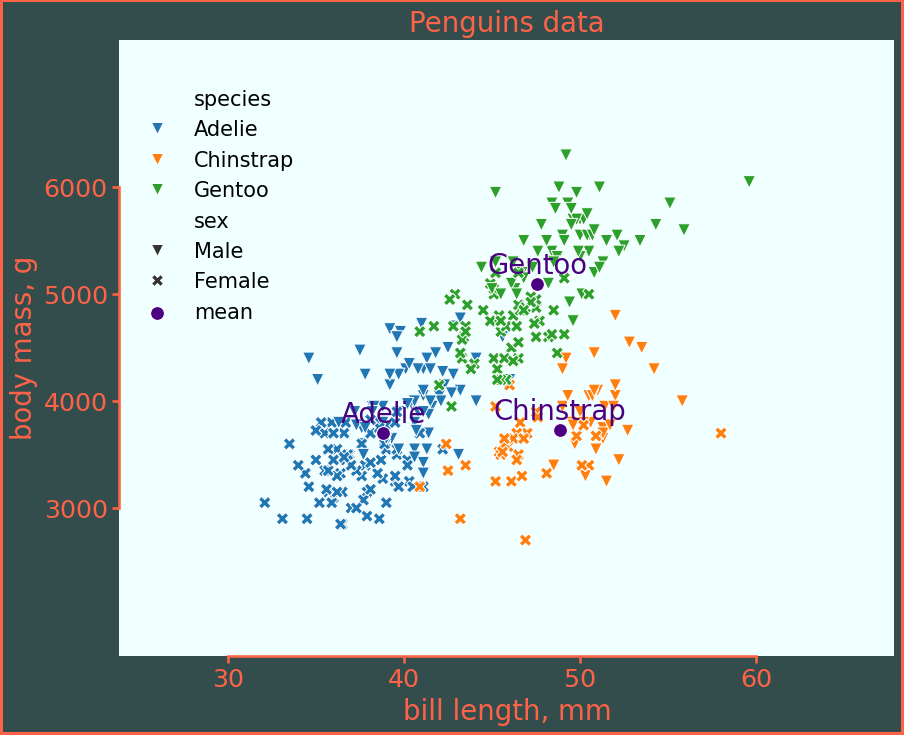

In [360]:
# Построим диаграмму рассеяния пары признаков (bill_length_mm, body_mass_g), используя searborn.

# # Изменим глобальные настройки для всех графиков.
# sns.set_context(context='talk', font_scale=1.3, rc=params_2)  # В контекстном месенджере не работает
# sns.set_style(style='darkgrid', rc=None)
# sns.set_theme(context='talk', style='darkgrid', font_scale=1.3, rc=params_2)  # аналог sns.set()

# Используем контекстный менеджер для локального изменения глобальных настроек (для данной диаграммы),
# в данном случае увеличили размер шрифта всех подписей и отдельно задали размер шрифта на легенде.
with sns.plotting_context(context="talk", font_scale=1.1, rc={'legend.fontsize': 15}):  # sns.plotting_context принимает не все rc-параметры, только настройки размера текста.
  # Настройка области построения
  fig, ax = plt.subplots(figsize=(10,8), facecolor=(.2,.3,.3),
                         edgecolor='tomato', linewidth=3)  # Рамочка вокруг по умолчанию имеет нулеву толщину, задали linewidth=2.
  # fig.set_facecolor((.2,.3,.3)), fig.set_edgecolor('tomato')
  ax.set_facecolor('azure')

  # Строим диаграммы
  sns.scatterplot(x="bill_length_mm", y="body_mass_g",
                    data=penguins,
                    hue='species',
                    style='sex',
                    markers={'Female':'X', 'Male':'v'}
                    )
  sns.scatterplot(x="bill_length_mm", y="body_mass_g",
                    data=avg_data,
                    # style='mean',
                    s=100, marker='o',
                    c='indigo',
                    label='mean'
                    )

  # Зададим подписи к средним значениям используя лямбда функцию.
  avg_data.apply(lambda x: ax.annotate(x.species, xy=(x.loc['bill_length_mm'],
                                        x.loc['body_mass_g']+100), ha='center', c='indigo'), axis=1)
  # # Подписи к средним значениям можно задать вручную.
  # plt.annotate('mean', xy=(avg_data.loc[0,'bill_length_mm']-2, avg_data.loc[0,'body_mass_g']+50), color='royalblue')

  ax.set_title("Penguins data", color='tomato')  # Можно использовать plt.title()
  ax.set_xlabel("bill length, mm", color='tomato')  # Можно использовать plt.xlabel()
  ax.set_ylabel("body mass, g", color='tomato')  # Можно использовать plt.ylabel()
  ax.legend(frameon=False, bbox_to_anchor=(.25, .95))

  # Регулируем отступ точек от осей
  ax.set_xmargin(0.3)
  ax.set_ymargin(0.3)
  # ax.set_xlim([25, 65])  # получить значения пределов ax.get_xlim() (атрибут класса sns.objects.Plot.limit).
  # ax.set_ylim([2000, 7000])

  # Настроим шкалу
  ax.set_xticks(ticks=np.arange(30, 70, 10), labels=np.arange(30, 70, 10),
                # color='tomato' # Меняет цвет только подписей, не шкалы
                )
  # ax.set_xticklabels(ax.get_xticklabels())
  ax.set_yticks(np.arange(3000, 7000, 1000), np.arange(3000, 7000, 1000))
  ax.tick_params(length=5, colors='tomato')  # colors='tomato' меняет цвет и шкалы и подписей, color - только шкалы.

  # Настроим оси
  ax.spines.left.set_color('tomato')
  ax.spines.left.set_bounds(3000, 6000)
  ax.spines.bottom.set_color('tomato')
  ax.spines.bottom.set_bounds(30, 60)
  sns.despine()  # Тот же результат ax.spines[['right', 'top']].set_visible(False) или ax.spines.right.set_visible(False) and ax.spines.top.set_visible(False)

  plt.show()
  plt.close()


___

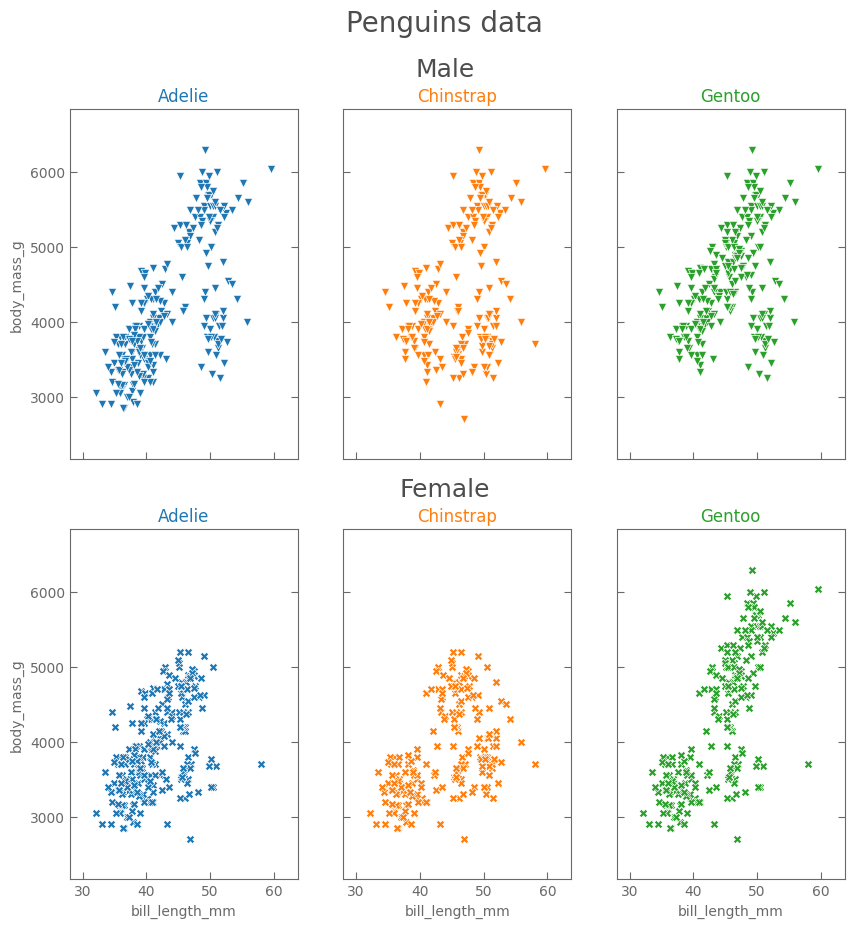

In [361]:
# Построим диаграммы рассеяния пары признаков (bill_length_mm, body_mass_g) разделив по виду и полу.

# Изменим глобальные настройки для всех графиков.
params_2 = {'axes.edgecolor': 'dimgray', 'axes.labelcolor': 'dimgray',
            'xtick.color': 'dimgray','xtick.direction': 'in',
            'ytick.color': 'dimgray', 'ytick.direction': 'in',
            'axes.edgecolor': 'dimgray', 'axes.labelcolor': 'dimgray'}
sns.set_style(rc=params_2)  # В контекстном менеджере не работает

# Настроим область рисунка
fig, axs = plt.subplots(2, 3, figsize=(10,10), sharex='col', sharey='row')

# Построим диаграммы
color_palette = dict(zip(["Adelie", "Chinstrap", "Gentoo"],[0, 1, 2]))
marker = dict(zip(["Male", "Female"],['v', 'X']))
for i, sex in enumerate(['Male',	'Female']):
  for j, species in enumerate(["Adelie", "Chinstrap", "Gentoo"]):
    sns.scatterplot(ax=axs[i, j],
                    x=penguins[(penguins.species == species) | (penguins.sex == sex)]["bill_length_mm"],
                    y=penguins[(penguins.species == species) | (penguins.sex == sex)]["body_mass_g"],
                    color=plt.cm.tab10(color_palette.get(species)),
                    marker=marker.get(sex)
                    )
    axs[i, j].set_title(species, color=plt.cm.tab10(color_palette.get(species)))
    axs[i, j].tick_params(length=5, right=True)  # Чтобы убрать шкалу length=0
    axs[i, j].set_xmargin(0.15)
    axs[i, j].set_ymargin(0.15)

# Добавим подписи
fig.suptitle("Penguins data", size=20, color='.3')
fig.text(.5, .92, 'Male', ha='center', va='center', size=18, color='.3')  # plt.figtext()
fig.text(.5, .5, 'Female', ha='center', va='center', size=18, color='.3')

# # Настройка видимости осей каждого графика вручную (результат аналогичен plt.subplots(sharex='col', sharey='row') выше).
# axs[0,0].xaxis.set_visible(False)
# axs[0,1].xaxis.set_visible(False), axs[0,1].yaxis.set_visible(False)

# # Управлять настройками каждого графика по отдельности можно использую plt.sca() из библиотеки matplotlib.
# # Например добавить название и убрать подписи данных для первой диаграммы
# plt.sca(axs[0,0])
# plt.title("Adelie")
# plt.xlabel(None), plt.xticks([])  # Равносильно задание plt.subplots(sharex='col', sharey='row') выше.



plt.show()
plt.close()  # При перезапуске кода, строится один график, а не добавляется ещё один к уже построенному.

mpl.rcParams.update(mpl.rcParamsDefault)  # Сброс настроек